In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [76]:
from skimage.restoration import inpaint, denoise_tv_chambolle, denoise_bilateral
from skimage import data
from skimage.util import random_noise
from skimage.segmentation import slic
from skimage.color import rgb2gray, label2rgb
from skimage.measure import find_contours
from skimage.filters import threshold_otsu

In [75]:
astro_dmg = plt.imread('./image-18-3-2.jpg')
image_w_logo = plt.imread('./image-18-3-3.jpg')
fruits = plt.imread('./image-18-3-5.jpg')
dog_noisy = plt.imread('./image-18-3-6.jpeg')
ls_noisy = plt.imread('./image-18-3-7.jpg')
woman = plt.imread('./image-18-3-10.jpg')
die = plt.imread('./image-18-3-13.jpg')

# Image restoration

In [3]:
def show_image(image, title='Image', cmap_type='gray', ax=None):
    if ax == None:
        plt.imshow(image, cmap=cmap_type)
        plt.title(title)
        plt.axis('off')
        plt.show()
    else:
        ax.imshow(image, cmap=cmap_type)
        ax.set(title=title)
        ax.axis('off')

In [52]:
def plot_comparison(original, filtered, title_filtered):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8),
                                   sharex=True, sharey=True)
    
    ax1.imshow(original, cmap='gray')
    ax1.set(title='Original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap='gray')
    ax2.set(title=title_filtered)
    ax2.axis('off')

## Let's restore a damaged image

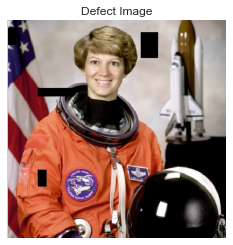

In [16]:
show_image(astro_dmg, 'Defect Image')

In [20]:
mask = np.zeros(astro_dmg.shape[:-1])
mask[10:70, 0:35] = 1
mask[160:190, 70:170] = 1
mask[25:100, 325:375] = 1
mask[350:435, 60:100] = 1

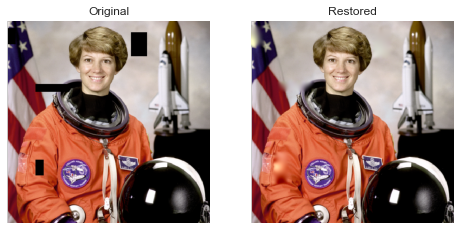

In [24]:
# apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(astro_dmg, mask,
                                            multichannel=True)

plot_comparison(astro_dmg, restored_image, 'Restored')

## Removing logos

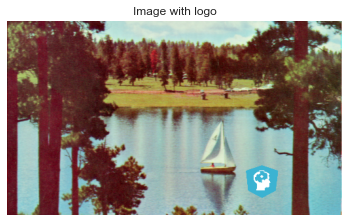

In [27]:
show_image(image_w_logo, 'Image with logo')

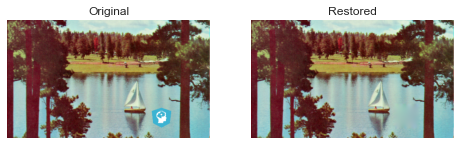

In [30]:
# create mask
mask = np.zeros(image_w_logo.shape[:-1])

mask[210:272, 360:425] = 1

# apply the inpainting to remove the logo
image_wo_logo = inpaint.inpaint_biharmonic(image_w_logo, mask, 
                                           multichannel=True)

plot_comparison(image_w_logo, image_wo_logo, 'Restored')

# Noise

## Let's make some noise!

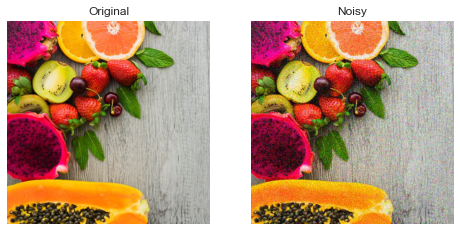

In [35]:
# add noise to fruits image
fruits_noisy = random_noise(fruits)

plot_comparison(fruits, fruits_noisy, 'Noisy')

## Reducing noise

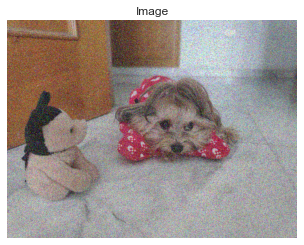

In [48]:
# their image is not that noisy lemme add some more
dog_noisy = random_noise(dog_noisy, 's&p', amount=0.3)

show_image(dog_noisy)

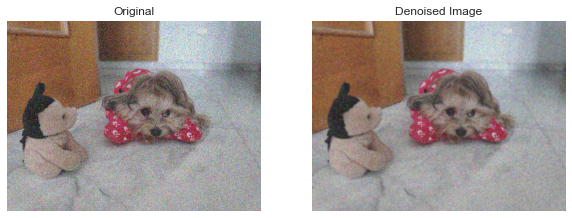

In [55]:
# apply total variation filter denoising
dog_denoised = denoise_tv_chambolle(dog_noisy,
                                    weight=0.5,
                                    multichannel=True)

plot_comparison(dog_noisy, dog_denoised, 'Denoised Image')

## Reducing noise while preserving edges

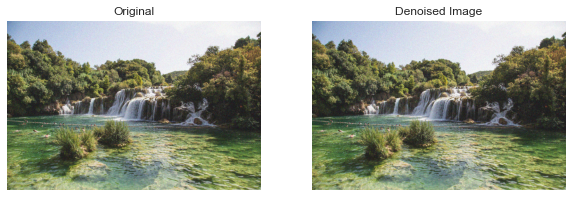

In [57]:
# apply bilateral filter denoising
ls_denoised = denoise_bilateral(ls_noisy,
                                multichannel=True)

plot_comparison(ls_noisy, ls_denoised, 'Denoised Image')

# Superpixels and segmentation

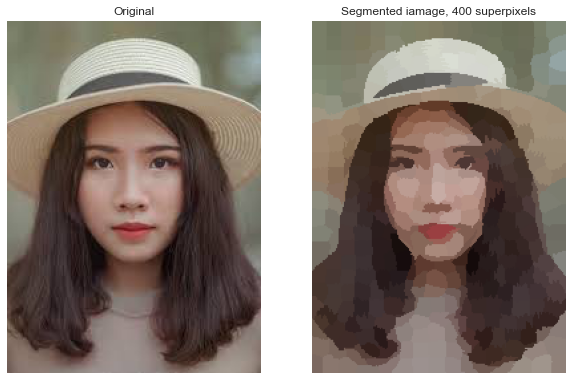

In [60]:
# obtain segmentation with 400 regions
segments = slic(woman, n_segments=400)

# put segments on top of original image
woman_segmented = label2rgb(segments, woman, kind='avg')

plot_comparison(woman, woman_segmented, 'Segmented iamage, 400 superpixels')

# Finding contours

## Contouring shapes

In [72]:
def show_image_contour(image, contours, cmap_type='gray'):
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.imshow(image, cmap=cmap_type)

    for n, contour in enumerate(contours):
        ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

    ax.axis('image')
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

In [73]:
horse = data.horse()

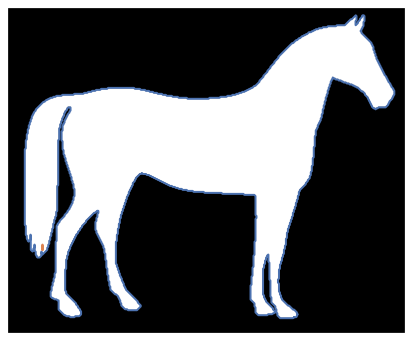

In [74]:
# find contours with constant level value of 0.8
contours = find_contours(horse, 0.8)

show_image_contour(horse, contours,
                   cmap_type='binary')

## Find contours of an image that is not binary

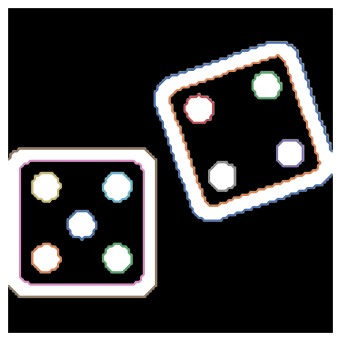

In [77]:
# Make the image grayscale
die_gray = rgb2gray(die)

# Obtain the optimal thresh value
thresh = threshold_otsu(die_gray)

# Apply thresholding
die_binary = die_gray > thresh

# Find contours at a constant value of 0.8
contours = find_contours(die_binary, 0.8)

# Show the image
show_image_contour(die_binary, contours)

## Count the dots in a dice's image

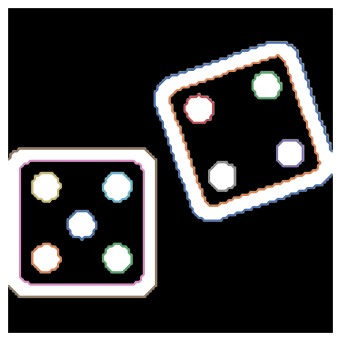

Dice's dots number: 9. 


In [78]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < 50]

# Shows all contours found 
show_image_contour(die_binary, contours)

# Print the dice's number
print("Dice's dots number: {}. ".format(len(dots_contours)))